# 投票の幾何学入門(Basic Geometry of Voting)

このノートは Donald G. Saari, Basic Geome Springer の読書記録である。

# 第1章 投票に関する諸問題(ある投票の寓話から選挙手順まで)

"From an Election Fable to Election Procedures"

この章は、イントロダクション。
ある架空の学部の宴会で提供する飲み物を選ぶ投票の話から始まり、多数決(plurality/majority vote)、決戦投票(runoff)、ペア比較(pairwise comparison)、ボルダルール(Borda count)、戦略的投票(strategic voting), etc を具体的に導入し、投票による意思決定の難しさを見せる。
筆者は、この集約方法の分かりにくさが、投票結果を組み合わせ的に見る事による複雑さが原因として、幾何学的な視点から眺めると、捉えやすくなると言っている。

# 数学的記述

- 投票者(Voters): $\mathcal{V} = \{v_1, v_2, \dots, v_N\}$.
    - すべての投票者の集合
- 選択肢・候補(choices, candidates): $\mathcal{C} = \{c_1, c_2, \dots, c_m\}$.
    - すべての選択肢・候補の集合
- 重み関数(weight function): $w:\mathcal{C} \rightarrow \mathbb{R}$.
    - 選択肢・候補に付与される重み。$\mathbb{R}$ に値をとる。
    - 投票者おのおのが選択肢に対して与える選好を表す。
- 重み空間(weight space): $\mathcal{W} = \{w| w \text{ is a weight function}\}$
    - すべての重み関数の集合。集約ルールによって、特定の部分集合に制限される
    - 例：多数決重み: $\mathcal{W}_{pl} = \{w| w(\mathcal{C})= \{\text{all one-hot vectors} \}\}$
- 投票(voting): $E:\mathcal{V} \rightarrow \mathcal{W}$.
    - 投票者の選好を表す関数。各投票者に重み関数を一つ対応させる。
- 投票空間(voting space): $\mathcal{E} = \{ E:\mathcal{V} \rightarrow \mathcal{W}\} \simeq \mathcal{W}^{|\mathcal{V}|} $
    - 全投票者のすべての可能な選好を表す集合。
- 集約ルール: $R:\mathcal{E} \rightarrow \mathbb{R}^m$.
    - 投票空間から、全体の選好（社会的選好）への写像。
    - 例: 線形的な集計(linear tally): $LT:\mathcal{E} \rightarrow \mathbb{R}^m$, 
        - $E \mapsto \sum_{v \in \mathcal{V}} E(v)$    
- 得点空間(Tally space) $\mathbb{T}:= R(\mathcal{W}^{|\mathcal{V}|}) \subseteq \mathbb{R}^m$
    - ある集約ルールの下行われた選挙の可能な結果全体を表す空間。


# 第2章 順序付け投票とペアワイズ投票の幾何学

"Geometry for Positional and Pairwise Voting"

## 2.1 領域の順序付け (Ranking Regions p.30~)

**定義 2.1.1.**
多数決(plurality election)とは、各投票者が自分の最も好ましい候補に1ポイントを投票する選挙である。候補のランキングは各候補に与えられたポイントの合計 $p(c_i)$ で決まる。$p(c_i) > p(c_j)$ の時、$c_i \succ c_j$、$p(c_i) = p(c_j)$ の時、$c_i \sim c_j$ と書く。

$\mathcal{C} = \{c_1, c_2, c_3\}$ の場合を考える。

この場合、$\mathbb{T} = \mathbb{R}_{\ge 0}^3 = \{(x_1, x_2, x_3) \in \mathbb{R}^3 | x_i \ge 0 \}$ である。

投票結果 $n = (n_1, n_2, n_3) \in \mathbb{T}$ は、自然な方法で候補の順序付けを決定する。例えば $(45, 75, 80)$ なら、 $c_3 \succ c_2 \succ c_1$ である。

**正規化された集計結果(normalized election tally)**

ある選挙結果 $n \in \mathbb{T}$ に対し、その $l_1$-ノルムを $\lVert n \rVert_1 := \sum_i |n_i|$ とする。この時、
$$ \textbf{q} = \frac{n}{\lVert n \rVert_1 }$$
を __*正規化された集計結果*__ と言う事にする。

$\textbf{q}$ の各成分は対応する候補の得た票の全体に対する割合を表している。

ここで、$\textbf{q}$ は
$$q_k \ge 0, \quad \sum_i q_i = 1$$
を満たすが、これは $\mathbb{R}_{\ge 0}^3$ 内の単位単体(a unit simplex)
$$Sim(3)= \{x \in \mathbb{R}_{\ge 0}^3 | \lVert x \rVert_1 = 1\}$$
の1点と考えることができる。この __*表現三角形*__ (representation triangle) は、３つの満場一致結果(unanimity outcome) $\textbf{e}_1 = (1,0,0), \textbf{e}_2 = (0,1,0), \textbf{e}_3 = (0,0,1)$ を通る正三角形である。

In [1]:
%matplotlib notebook

from math import sqrt
from typing import Dict, List, NamedTuple, Optional, Tuple

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

<IPython.core.display.Javascript object>


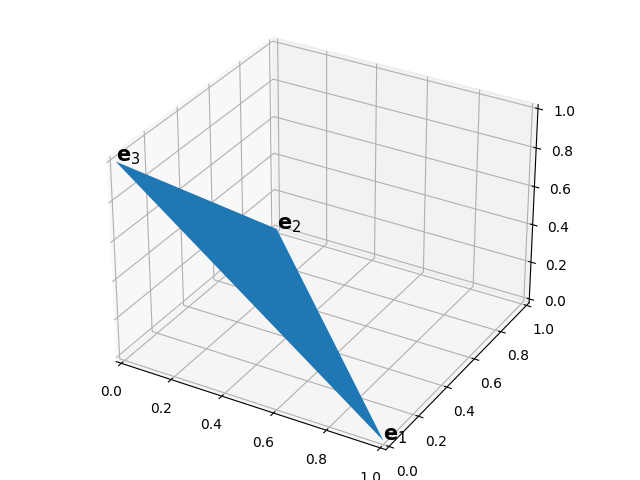

[[(1, 0, 0), (0, 1, 0), (0, 0, 1)]]


In [2]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

e1 = [1,0,0]
e2 = [0,1,0]
e3 = [0,0,1]

verts = [list(zip(e1, e2, e3))]
print(verts)
ax.add_collection3d(Poly3DCollection(verts))
for i, e in enumerate([e1, e2, e3], start=1):
    ax.text3D(*e, "$\mathbf{e}_" + f"{i}$", size=15)
plt.show()

「近ければ近いほど良い」という恋愛のように、$\textbf{q} \in Sim(3)$ に割り当てられる順位は、$\textbf{q}$ の各頂点への近さで決まる: $\textbf{q}$ が $\textbf{e}_k$ に近いほど、その選挙では候補 $c_k$ が好まれている事になる。

表現三角形は、13種類の推移的な選好に対応する領域に分ける事ができる。

- 狭義順序 $c_i \succ c_j \succ c_k$ 6種類
- 2つが同位の順序 $c_i \succ c_j \sim c_k, c_i \sim c_j \succ c_k$ 6種類
- 全同位 $c_1 \sim c_2 \sim c_3$ 1 種類

逆に、推移的な選好関係はこの13種類のみなので、表現三角形が推移的選好関係の幾何的な表現を与えていると考える事ができる。

In [3]:
origin = np.zeros(2)
basis = np.array([[-sqrt(3)/2, -1/2], [sqrt(3)/2, -1/2], [0, 1]])
labels1 = [r'$c_1$', '$c_2$', '$c_3$']
labels2 = [r'$\mathbf{e}_1$', r'$\mathbf{e}_2$', r'$\mathbf{e}_3$']
contour = np.append(basis, basis[:1], axis=0)

class Region(NamedTuple):
    name: str
    vertices: List[np.array]
        
class TextColors(NamedTuple):
    region_label: str = "lightgrey"
    base_labels: str = "grey"

regions = [Region("1", [origin, basis[0], (basis[0] + basis[1])/2]),
           Region("2", [origin, basis[0], (basis[0] + basis[2])/2]),
           Region("3", [origin, basis[2], (basis[2] + basis[0])/2]),
           Region("4", [origin, basis[2], (basis[2] + basis[1])/2]),
           Region("5", [origin, basis[1], (basis[1] + basis[2])/2]),
           Region("6", [origin, basis[1], (basis[1] + basis[0])/2])]

def draw_on_rep_triangle(tallies:Optional[Tuple[np.array, str]] = None,
                         region_labels: Optional[Dict[str, str]] = None,
                         base_labels: List[str] = labels1,
                         text_cols: TextColors = TextColors()):
    plt.figure()
    for region in regions:
        centre = sum(region.vertices)/3
        name = region_labels[region.name] if region_labels else region.name
        plt.text(*centre, name, 
                 horizontalalignment='center',
                 verticalalignment='center',
                 size= 20, color=text_cols.region_label)

    # Outer boundary of the representation triangle
    plt.plot(*contour.transpose(), '--', color='grey')

    # Indifference lines (or tie lines)
    for base in basis:
        plt.plot(*np.array([base, -1/2 * base]).transpose(), color='black')

    # Unanimity points    
    # plt.plot(*basis.transpose(), 'o', color='grey')

    # Draw texts at unanimity points
    for label, coord in zip(base_labels, basis):
        x, y = 1.07 * coord - 0.025
        plt.text(x, y, label, size=13, color=text_cols.base_labels)

    # Draw election results
    if tallies:
        handles = []
        for tally, label in tallies:
            coord = np.matmul(basis.transpose(), normalize(tally)).transpose()
            point, = plt.plot(*coord, '*', label=label + ": " + join_lin_ord_latex(get_lin_order(list(zip(labels1, tally)))))
            handles.append(point)
            plt.text(*(coord + 0.02), label, size=15, verticalalignment="center")

        plt.legend(handles=handles)
    plt.axis('off')
    plt.show()


def normalize(tally):
    return tally/sum(tally)


def get_lin_order(tally):
    weight_to_cand = {}
    for cand, weight in tally:
        current_list = weight_to_cand.get(weight, [])
        weight_to_cand[weight] = current_list + [cand]
    return sorted(weight_to_cand.items(), reverse=True, key=lambda x: x[0])


def join_equivalents_latex(text):
    return "".join(text).replace("$$", " \sim ")


def join_lin_ord_latex(lin_ord):
    s = join_equivalents_latex(lin_ord.pop(0)[1])
    for item in lin_ord:
        s += " > " + join_equivalents_latex(item[1])
    return s
        

tally = np.array([("$c_1$", 1/2), ("$c_2$", 1/4), ("$c_3$", 1/4)])
lin_ord = get_lin_order(tally)
join_lin_ord_latex(lin_ord)

'$c_1$ > $c_2 \\sim c_3$'

<IPython.core.display.Javascript object>


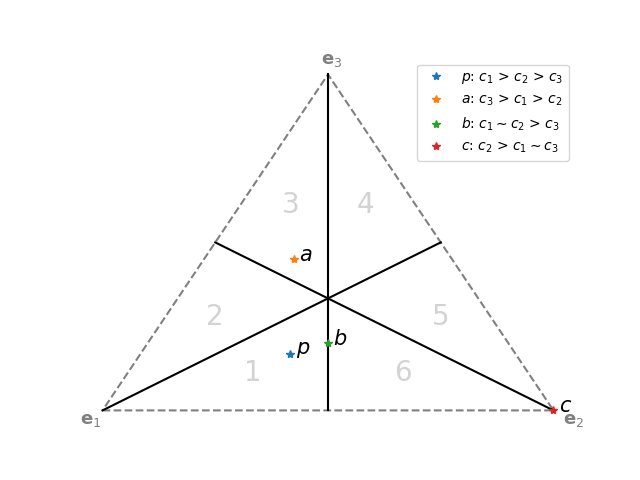

In [4]:
tallies = [(np.array([3, 2, 1]), "$p$"),
          (np.array([7/20, 4/20, 9/20]), "$a$"),
          (np.array([2/5, 2/5, 1/5]), "$b$"),
          (np.array([0, 1, 0]), "$c$")]

draw_on_rep_triangle(tallies, base_labels=labels2)

### 他の2項関係による図形
3つの選択肢 $\{c_1, c_2,c_3\}$ の選挙で、ペア $(c_i, c_j) \; c_i \ne c_j$ 毎の選好関係を、それぞれ独立に区間 $[-1,1]$ で表す場合を考える。
すなわち、ある投票の結果、以下のような集計関数があたえられるような場合を考える。
$$
p: \{ (c_1, c_2),(c_2,c_3),(c_3, c_1)\} \rightarrow [-1, 1]
$$
ここで
- $p(c_i,c_j) > 0$ の場合、 $c_i$ が $c_j$ より好まれている度合いを表し、 $c_i \succ c_j$ と記す。
- $p(c_i,c_j) < 0$ の場合、 $c_j$ が $c_i$ より好まれている度合いを表し、 $c_j \succ c_i$ と記す。
- $p(c_i,c_j) = 0$ の場合、 $c_i$ と $c_j$ は同順位であり、 $c_i \sim c_j$ と記す。

と定める。

各ペア $(c_i, c_j)$ に対応する区間は3つあるので、全ての可能な選挙結果の集合は $[-1,1]^3$ となり、選挙結果を表す幾何対象は立方体となる。

$i \ne j$ であるような各ペア $(c_i, c_j)$ ごとに、3つの選好関係 $\{\succ, \sim, \prec\}$ になりうるので、可能な全体の選好関係は $3^3 = 27$ 通りある。この中には、上で挙げた13種類の推移的な順序関係以外の、非推移的な順序関係も($27 - 13 = 14$ 種類)含まれている。

非推移的な順序
- $c_i \succ c_j \succ c_k \succ c_i$, 循環的(cyclic)
    - 立方体の中で、下に示す2つの部分立方体の内部に対応
- $c_i \succ c_j \succ c_k$ かつ $c_i \sim c_k$ 非循環的(acyclic)
    - 上記の領域に接する平面（輪郭は省く）
- $c_i \sim c_j \sim c_k$ かつ $c_i \succ c_k$ 非循環的(acyclic)
    - 立方体の中の3軸にあたる領域

### More examples in the exercises to appear here,,,



<IPython.core.display.Javascript object>


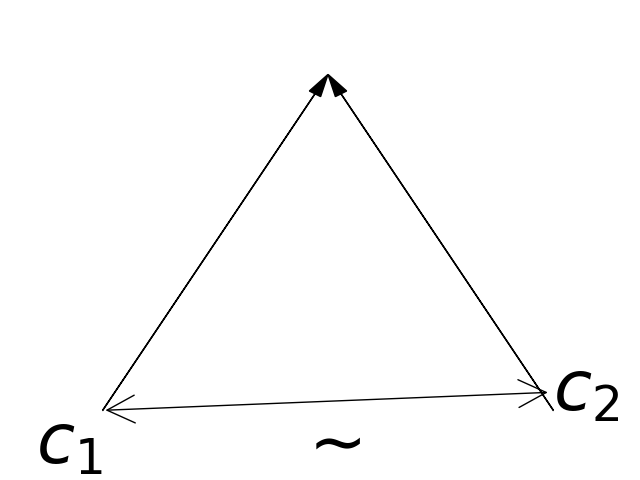

In [19]:
fig = plt.figure()
ax = plt.axes()
p0 = np.array([-sqrt(3)/2, -1/2])
p1 = np.array([sqrt(3)/2, -1/2])
p2 = np.array([0, 1])

h_width = 0.05
h_length = 0.1
# ax.arrow(*p0, *(p1 -p0), linestyle="--", head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
#ax.arrow(*p1, *(p0 -p1), ls="--", head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
ax.arrow(*p0, *(p2 -p0), head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')
ax.arrow(*p1, *(p2 -p1), head_width=h_width, head_length=h_length, length_includes_head=True, fc='k', ec='k')

ax.text(*p0, "$c_1$", size=50, horizontalalignment='right', verticalalignment='top')
t = ax.text(*((p0 + p1)/2), "$\sim $", size=50, horizontalalignment='center', verticalalignment='top')
# t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='grey'))

ax.annotate("$c_2$", size=50,
            xy=p0, xycoords='data',
            xytext=p1, textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )


plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


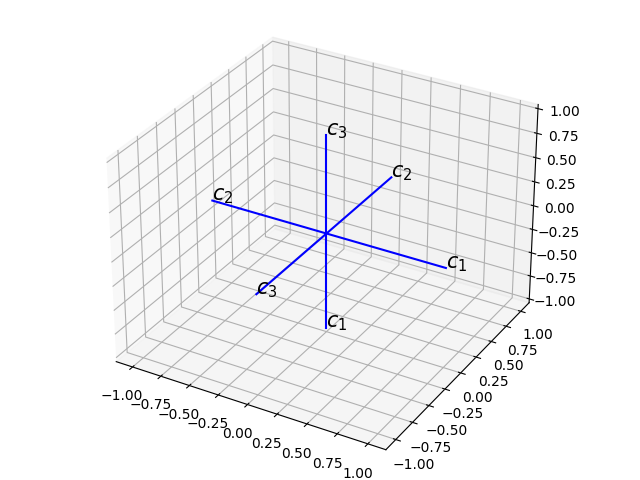

In [6]:
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

axis_list = [[([1,0,0], "$c_1$"), ([-1,0,0], "$c_2$")],
            [([0,1,0], "$c_2$"), ([0,-1,0], "$c_3$")],
            [([0,0,1], "$c_3$"), ([0,0,-1], "$c_1$")]]

for axis in axis_list:
    points, labels = list(zip(*axis))
    ax.plot(*list(zip(*points)), color="blue")
    for point, label in axis:
        ax.text(*point, label, size=15)
plt.show()

<IPython.core.display.Javascript object>


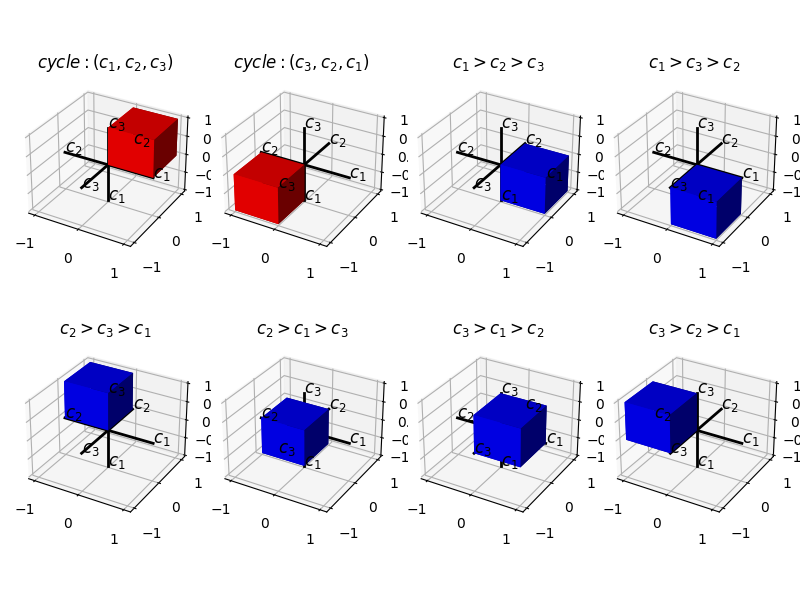

In [7]:
# prepare coordinates
vert_x, vert_y, vert_z = np.indices((3, 3, 3)) - 1
vox_x, vox_y, vox_z = np.indices((2, 2, 2)) - 0.5

# draw cuboids in the top left and bottom right corners
voxels = [
    ("$cycle:(c_1,c_2,c_3)$", "red", (vox_x >= 0) & (vox_y >= 0) & (vox_z >= 0)),
    ("$cycle:(c_3,c_2,c_1)$", "red", (vox_x <= 0) & (vox_y <= 0) & (vox_z <= 0)),
    ("$c_1 > c_2 > c_3$", "blue", (vox_x >= 0) & (vox_y >= 0) & (vox_z <= 0)),
    ("$c_1 > c_3 > c_2$", "blue", (vox_x >= 0) & (vox_y <= 0) & (vox_z <= 0)),
    ("$c_2 > c_3 > c_1$", "blue", (vox_x <= 0) & (vox_y >= 0) & (vox_z >= 0)),
    ("$c_2 > c_1 > c_3$", "blue", (vox_x <= 0) & (vox_y >= 0) & (vox_z <= 0)),
    ("$c_3 > c_1 > c_2$", "blue", (vox_x >= 0) & (vox_y <= 0) & (vox_z >= 0)),
    ("$c_3 > c_2 > c_1$", "blue", (vox_x <= 0) & (vox_y <= 0) & (vox_z >= 0)),
]
# combine the objects into a single boolean array
# voxels = cycle1 | c_123
# print(voxels)

fig, axes_list = plt.subplots(2, 4, subplot_kw=dict(projection="3d"), figsize=(8,6))

for ax, (name, col, voxel) in zip([ax for row in axes_list for ax in row], voxels):

    # facecolors = np.where(voxel, '#5555CC90', '#FFD65D90')
    facecolors = np.where(voxel, col, '#FFD65D90')
    # edgecolors = np.where(voxel, '#7D84A6', '#BFAB6E')
    # print(facecolors)
    ax.set_title(name)
    ax.voxels(vert_x, vert_y, vert_z,
              voxel, facecolors=facecolors)
    for axis in axis_list:
        points, labels = list(zip(*axis))
        ax.plot3D(*list(zip(*points)), color="black", linewidth=2)
        for point, label in axis:
            ax.text(*point, label, size=12)   

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


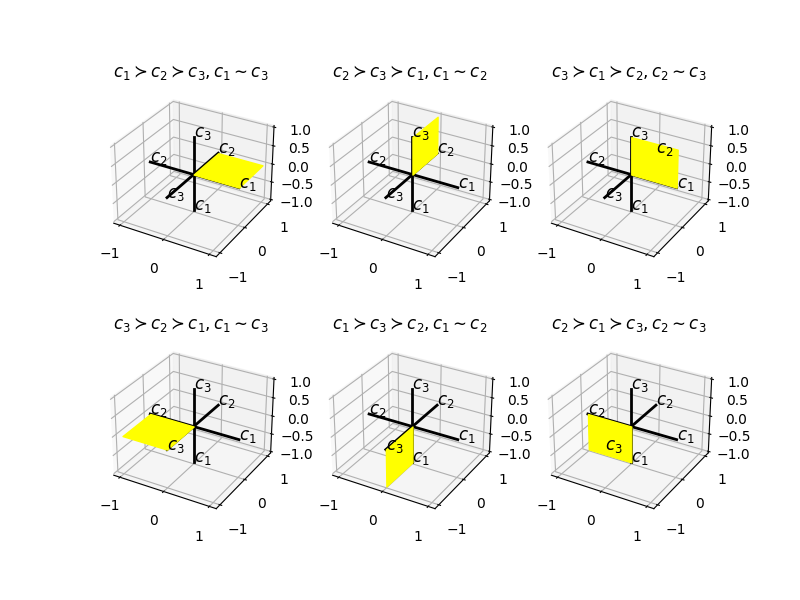

In [8]:
fig, axes_list = plt.subplots(2, 3, squeeze=False, subplot_kw=dict(projection="3d"), figsize=(8,6))

origin3 = np.zeros(3)
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

squares = [("$c_1 \succ c_2 \succ c_3, c_1 \sim c_3$", "yellow", np.array([origin3, e1, e1 + e2,  e2])),
           ("$c_2 \succ c_3 \succ c_1, c_1 \sim c_2$", "yellow", np.array([origin3, e2, e2 + e3,  e3])),
           ("$c_3 \succ c_1 \succ c_2, c_2 \sim c_3$", "yellow", np.array([origin3, e1, e1 + e3,  e3])),
           ("$c_3 \succ c_2 \succ c_1, c_1 \sim c_3$", "yellow", np.array([origin3, -e1, -e1 - e2,  -e2])),
           ("$c_1 \succ c_3 \succ c_2, c_1 \sim c_2$", "yellow", np.array([origin3, -e2, -e2 - e3,  -e3])),
           ("$c_2 \succ c_1 \succ c_3, c_2 \sim c_3$", "yellow", np.array([origin3, -e1, -e1 - e3,  -e3])),
          ]

for ax, (name, col, square) in zip([ax for row in axes_list for ax in row], squares):
    ax.set_title(name)
    ax.add_collection3d(Poly3DCollection([square], color=col))
    for axis in axis_list:
        points, labels = list(zip(*axis))
        ax.plot3D(*list(zip(*points)), color="black", linewidth=2)
        for point, label in axis:
            ax.text(*point, label, size=12)   

#plt.tight_layout()
plt.show()

## 2.2 投票プロファイルと選挙写像
"Profiles and Election Mappings"

ここでは、各投票者の選好が、狭義線形順序(strict linear order)がであると仮定する。

投票者の型(type)とは、その投票者の候補のランク付けのこととする。全部で $m!$ 通りの可能性がある。i.e. $m!$ の投票者型がある。

今, $m=3$ の場合を考え、以下のように型に番号を振り分ける。

|型|ランキング |
|-|-|
|1|$$c_1\succ c_2 \succ c_3$$|
|2|$$c_1\succ c_3 \succ c_2$$|
|3|$$c_3\succ c_1 \succ c_2$$|
|4|$$c_3\succ c_2 \succ c_1$$|
|5|$$c_2\succ c_3 \succ c_1$$|
|6|$$c_2\succ c_1 \succ c_3$$|

__*定義2.2.1*__ (p.38) $p_j$ を、$j$ 番目の型($j=1,\dots,n!$) の全体に対する割合を表すとする。ベクトル $\textbf{p} = (p_1,\dots,p_{n!})$ を __(正規化)投票プロファイル__ と呼ぶ。

例. $\{c_1,c_2,c_3\}$ の場合、$(\frac{1}{6}, 0, \frac{1}{3}, 0,\frac{1}{2}, 0)$ は

|型|ランキング |割合|
|-|-|-|
|1|$$c_1\succ c_2 \succ c_3$$|$$\frac{1}{6}$$|
|2|$$c_1\succ c_3 \succ c_2$$|$$0$$|
|3|$$c_3\succ c_1 \succ c_2$$|$$\frac{1}{3}$$|
|4|$$c_3\succ c_2 \succ c_1$$|$$0$$|
|5|$$c_2\succ c_3 \succ c_1$$|$$\frac{1}{2}$$|
|6|$$c_2\succ c_1 \succ c_3$$|$$0$$|

というプロファイルを表す。

一般に、$\{c_1,c_2,\dots,c_n\}$ の場合、選挙プロファイルは、$n!$ 次元単位単体
$$
Si(n!) = \left\{\mathbf{y} = (y_1,\dots,y_n) \in \mathbb{R}^{n!}\middle| \; y_j \ge 0, \sum_{j=1}^{n!}y_j = 1\right\}
$$

の有理点である。$Si(n!)$ を、正規化選挙プロファイル空間とよぶ事にする。

$n!$ は、選択肢の増加と共にすぐに大きくなるので、直接 $Si(n!)$ を可視化し、見たり、直感的に考察したりするのは不可能である。しかし、我々の考察にとって、この $Si(n!)$ こそが本丸なので、使ってどうにか理解する必要がある。そこで、幾何学である。

満場一致プロファイル $\mathbf{E}_i$ とは、$j$-成分が $(\mathbf{E}_i)_j = \delta_{ij}$ (Kronecker's delta)となるようなベクトルである。

6つの満場一致プロファイル $\{\mathbf{E}_i\}_{i=1}^{6}$ は、$Si(6)$ の頂点であり、$Si(6)$ はこの頂点の
$$
Si(6) = \left\{\mathbf{p} = (p_1,\dots,p_6) = \sum_{j=1}^6 p_j \mathbf{E}_j \; \middle| \; p_j \ge 0, \sum_{j=1}^{n!}p_j = 1\right\}
$$

という線形和で表す事ができる(非負正規化重みによる線形結合)。

6次元空間の対象はこのままでは理解することは難しいが、第3章で導入する座標系によって、3つの選択肢の選挙プロファイルを「見る」事が可能になる。

ここでは、一先ず原始的だが有益な選挙プロファイルの表現方法を挙げておく

#### 例:
いま、各投票者の選好が狭義線形順序であると仮定しているので、可能な選好は6通りである。これらの順序は、表現三角形 $Sim(3)$ の6つの領域と対応しているので、選挙プロファイルの各成分を対応する領域に割り当てる事で、プロファイルを可視化する事ができる。例えば、$\mathbf{p} = \left(0, \frac{1}{2}, 0, \frac{1}{3}, 0, \frac{1}{6} \right)$ を以下のようにプロットできる。

<IPython.core.display.Javascript object>


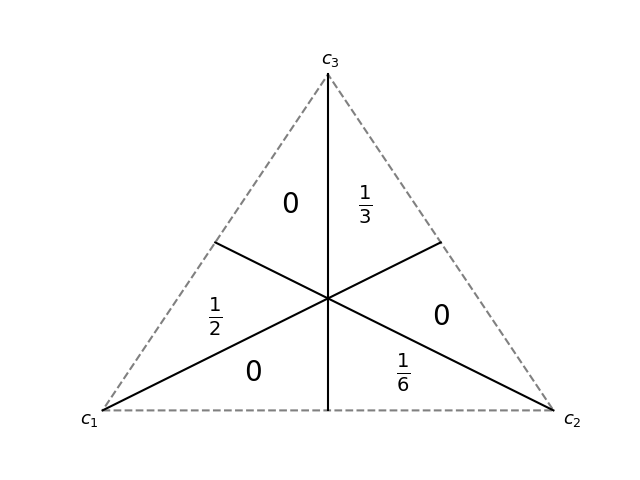

In [9]:
draw_on_rep_triangle(region_labels={"1": r"$0$",
                                   "2": r"$\frac{1}{2}$",
                                   "3": "$0$",
                                   "4": r"$\frac{1}{3}$",
                                   "5": r"$0$",
                                   "6": r"$\frac{1}{6}$"},
                    text_cols=TextColors(region_label="black", base_labels="black"))

### 2.2.1 選挙写像 (The Election Mapping)

__定義__
選挙写像(Election mapping) $f$ とは、
$$
f: \mathbb{P} = Si(m!) \rightarrow Si(m) = \mathbb{T}
$$
のことである。すなわち、正規化された選挙プロファイル空間 $\mathbb{P}$ から、正規化された選挙結果の空間 $\mathbb{T}$  への写像である。

__例：多数決の場合__

$f:Si(6) \rightarrow Si(3)$ を以下のような線形写像とすれば、$m=3$ の多数決の場合の選挙写像が作ることができる.

$\{\mathbf{E}_1, \mathbf{E}_2\}$ は $c_1$ を、$\{\mathbf{E}_5, \mathbf{E}_6\}$ は $c_2$ を, $\{\mathbf{E}_3, \mathbf{E}_4\}$ は $c_3$ を一番に選好している事から、まずは、基底 $\{\mathbf{E}_{j}\}_{j=1}^6$ に対して
$$
f(\mathbf{E}_j) =
\begin{cases}
  \mathbf{e}_{1}   & \lceil \frac{j}{2} \rceil = 1 \\
  \mathbf{e}_{3}   & \lceil \frac{j}{2} \rceil = 2 \\
  \mathbf{e}_{2}   & \lceil \frac{j}{2} \rceil = 3  
\end{cases}
$$
とする。こうすれば、一般の元 $\mathbf{p} \in \mathbb{P}$ に対しては
$$
f(\mathbf{p}) = f\left(\sum_{j=1}^6 p_j \mathbf{E}_j\right) = \sum_{j=1}^6 p_j f\left(\mathbf{E}_j\right)\\
= (p_1 + p_2, p_5 + p_6, p_3 + p_4)
$$
となる。
### 2.2.2 選挙結果の幾何学(The Geometry of Election Outcomes)
これまでは、有限人の投票者による、一人一票、すなわち全員が等しい重みを持つ投票を考えてきたが、この場合、選挙結果は必ず $\mathbb{Q}^m$ の部分空間になる。なので、選挙結果の空間として、$\mathbb{Q}^m \subseteq \mathbb{T} \subseteq \mathbb{R}^m$ を考えるのは、不要な一般化をしているのではないかとの、疑念が生じる。

しかし、より一般には、任意の実数による、投票者への重み付けによる投票や、投票者数が無限になる極限を含む状況などを考察対象にする事により、選挙結果空間として、 $\mathbb{Q}^m \subseteq \mathbb{T} \subseteq \mathbb{R}^m$ を考えた方が、一般性が高くなる事が分かる。よって、この本では、特別の記述がない限り、これからは選挙結果ベクトルの成分が無理数の値を取る場合も含むことを暗に仮定する。

### More examples in the exercises to appear here,,,

# 第3章 コンドルセの問題

"Problem with Condorcet"

# 第4章 順序付け投票とボルダスコアリング

"Positional Voting And the BC (Borda Count)"

# 第5章 その他の投票問題

"Other Voting Issues"

Let us construct a projection $p_{\hat{\textbf{n}} }$ on the plane perpendicular to
$$ \hat{\textbf{n}} := \frac{\textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3}{\lVert \textbf{e}_1 + \textbf{e}_2 + \textbf{e}_3 \rVert_2}
= \left(\frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}, \frac{1}{\sqrt{3}}\right)$$


Take the 1st perpendicular vector to be
$$\textbf{b}_1 = \textbf{e}_3 - (\textbf{e}_3 \cdot \hat{\textbf{n}})\hat{\textbf{n}}
=\begin{pmatrix}  0 \\ 0\\ 1 \end{pmatrix}
-\begin{pmatrix}  \frac{1}{3}\\ \frac{1}{3}\\ \frac{1}{3} \end{pmatrix}
= \begin{pmatrix}  -\frac{1}{3}\\ -\frac{1}{3}\\ \frac{2}{3} \end{pmatrix} $$
and normalizing it, we get the first base of the plane 
$$\hat{\textbf{b}}_1 = 
\begin{pmatrix}  -\frac{1}{\sqrt{6}}\\ -\frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix}$$

$$\hat{\textbf{b}}_2 =
\begin{pmatrix}  \frac{1}{- \sqrt{6}}\\ - \frac{1}{\sqrt{6}}\\ \frac{2}{\sqrt{6}} \end{pmatrix} \times 
\begin{pmatrix}  \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}}\\ \frac{1}{\sqrt{3}} \end{pmatrix}
= \begin{pmatrix}  - \frac{1}{\sqrt{2}}\\ \frac{1}{\sqrt{2}}\\ 0 \end{pmatrix}$$
Then $p_{\hat{\textbf{n}}}$ can be defined as follows
$$p_{\hat{\textbf{n}}}(\textbf{x}) = \sum_{i=1}^2 (\textbf{x} \cdot \hat{\textbf{b}}_i)\hat{\textbf{b}}_i$$
we represent the projected point as a point on 2D-plane comprehensing the coefficient $b_1$ of $\hat{\textbf{b}}_1$ as $y$-axis and the coefficient $b_2$ of $\hat{\textbf{b}}_2$ as $x$-axis.

In particular, the projected image of $\textbf{e}_i$ are
$$\left\{
\begin{pmatrix}  -\frac{1}{\sqrt{2}}\\ -\frac{1}{ \sqrt{6}} \end{pmatrix},
\begin{pmatrix}  \frac{1}{\sqrt{2}}\\ - \frac{1}{\sqrt{6}} \end{pmatrix},
\begin{pmatrix}  0 \\  \frac{2}{\sqrt{6}} \end{pmatrix}
\right\}
$$

<IPython.core.display.Javascript object>


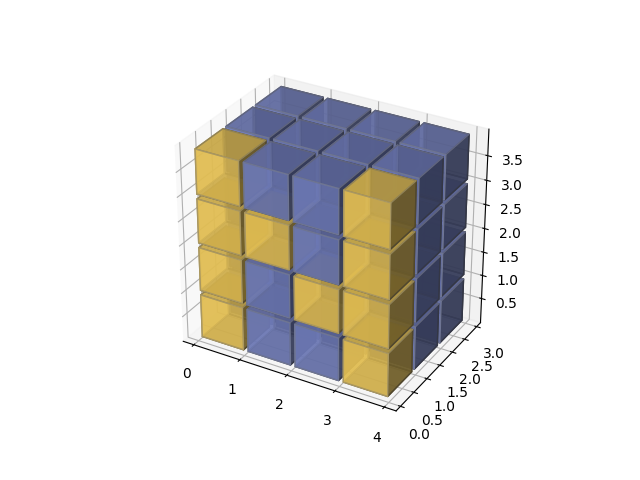

In [10]:
# Example code from matplolib tutorial
import matplotlib.pyplot as plt
import numpy as np


def explode(data):
    size = np.array(data.shape)*2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, '#FFD65DC0', '#7A88CCC0')
edgecolors = np.where(n_voxels, '#BFAB6E', '#7D84A6')
filled = np.ones(n_voxels.shape)

# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect('equal')

plt.show()